In [4]:

!pip install tensorflow
!pip install matplotlib
!pip install pillow


In [7]:
import numpy as np
from PIL import Image
import os

def create_random_image(size, save_path):
    img = Image.fromarray(np.random.randint(0, 256, size=(size[1], size[0], 3), dtype=np.uint8))
    img.save(save_path)

# Parameters
img_size = (224, 224)
num_images = 100

# Create directories
os.makedirs('/content/synthetic/train/class1', exist_ok=True)
os.makedirs('/content/synthetic/train/class2', exist_ok=True)

# Generate random images
for i in range(num_images):
    create_random_image(img_size, f'/content/synthetic/train/class1/image_{i}.jpg')
    create_random_image(img_size, f'/content/synthetic/train/class2/image_{i}.jpg')


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/synthetic/train'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' if more than two classes
)


Found 200 images belonging to 2 classes.


In [9]:
import tensorflow as tf

# VGG-16 Model
def build_vgg16_model():
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# DenseNet-201 Model
def build_densenet201_model():
    base_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train VGG-16
vgg16_model = build_vgg16_model()
vgg16_history = vgg16_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10
)

# Train DenseNet-201
densenet201_model = build_densenet201_model()
densenet201_history = densenet201_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 109s 20s/step - accuracy: 0.4700 - loss: 1.8199
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.4688 - loss: 2.7253 
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 121s 17s/step - accuracy: 0.5590 - loss: 2.8211
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.4062 - loss: 3.3198 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 105s 17s/step - accuracy: 0.4689 - loss: 2.3813
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.4688 - loss: 1.7380 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 124s 20s/step - accuracy: 0.4761 - loss: 2.1649
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7500 - loss: 0.6097
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 106s 17s/step - accuracy: 0.5487 - loss: 1.5836
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5000 - loss: 0.9663 
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 84s 9s/step - accuracy: 0.5028 - loss: 23.4292
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4688 - loss: 10.9685
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 64s 8s/step - accuracy: 0.5365 - loss: 15.3350
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s

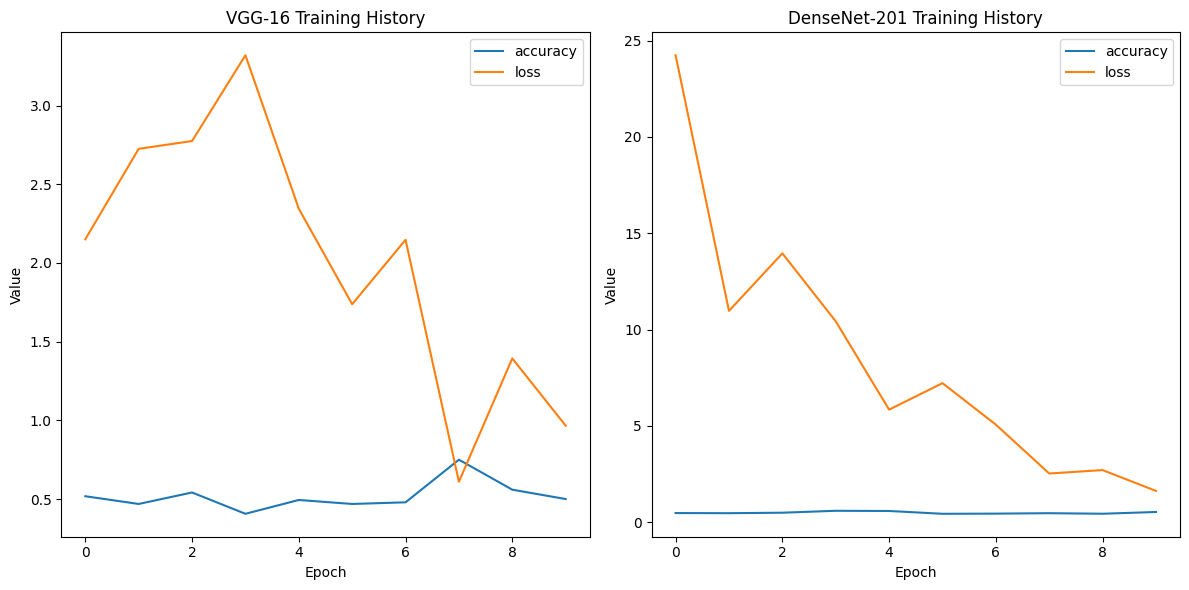

In [10]:
import matplotlib.pyplot as plt

# Plot VGG-16 Training History
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='accuracy')
plt.plot(vgg16_history.history['loss'], label='loss')
plt.title('VGG-16 Training History')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

# Plot DenseNet-201 Training History
plt.subplot(1, 2, 2)
plt.plot(densenet201_history.history['accuracy'], label='accuracy')
plt.plot(densenet201_history.history['loss'], label='loss')
plt.title('DenseNet-201 Training History')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()
